https://www.reddit.com/r/probabilitytheory/comments/67c63p/probably_of_a_range_beating_another_range/

In [52]:
import numpy as np
MINA = 2
MAXA = 7
MINB = 4
MAXB = 12
WIN = 0
LOSE = 0
DRAW = 0

for a in range(MINA, MAXA+1):
    for b in range(MINB, MAXB + 1):
        if (a > b):
            LOSE += 1
        if (a == b):
            DRAW += 1
        if (a < b):
            WIN += 1

print("DRAW is " + str(DRAW/sum([DRAW,WIN,LOSE])))
print("b wins is " + str(WIN/sum([DRAW,WIN,LOSE])))
print("a wins is " + str(LOSE/sum([DRAW,WIN,LOSE])))

DRAW is 0.07407407407407407
b wins is 0.8148148148148148
a wins is 0.1111111111111111


In [53]:
a = np.arange(2,8);b = np.arange(4,13)
print('a:',a,'b:',b)

a: [2 3 4 5 6 7] b: [ 4  5  6  7  8  9 10 11 12]


In [54]:
def game(a,b):
    pick_a = np.random.choice(a,size=1,replace=False)[0]
    pick_b = np.random.choice(b,size=1,replace=False)[0]
    if pick_a > pick_b:
        return pick_a,pick_b,'a'
    elif pick_a == pick_b:
        return pick_a,pick_b,'0'
    elif pick_a < pick_b:
        return pick_a,pick_b,'b'

# test the function above:

In [55]:
for ii in range(10):
    pick_a,pick_b,result = game(a,b)
    print('a:',pick_a,'b:',pick_b,'result:',result)

a: 2 b: 5 result: b
a: 3 b: 9 result: b
a: 4 b: 11 result: b
a: 7 b: 11 result: b
a: 7 b: 4 result: a
a: 7 b: 10 result: b
a: 3 b: 10 result: b
a: 5 b: 7 result: b
a: 7 b: 6 result: a
a: 7 b: 11 result: b


In [56]:
repeat_result = []
for simulate in range(500):
    result = []
    for time in range(500):
        _,_,temp = game(a,b)
        result.append(temp)
    result = np.array(result)
    prob_a = sum(result == 'a')/len(result)
    prob_t = sum(result == '0')/len(result)
    prob_b = sum(result == 'b')/len(result)
    repeat_result.append([prob_a,prob_t,prob_b])
repeat_result = np.array(repeat_result)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

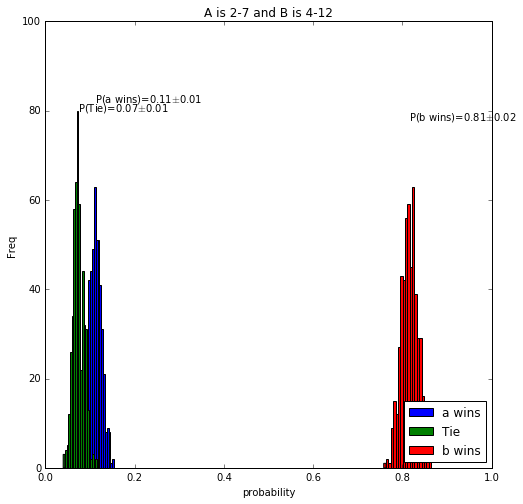

In [58]:
fig, ax = plt.subplots(figsize=(8,8))
_=ax.hist(repeat_result[:,0],bins=20,color='blue',label='a wins')
_=ax.hist(repeat_result[:,1],bins=20,color='green',label='Tie')
_=ax.hist(repeat_result[:,2],bins=20,color='red',label='b wins')
_=ax.annotate('P(a wins)=%.2f$\pm$%.2f'%(repeat_result.mean(0)[0],repeat_result.std(0)[0]),
              xy=(repeat_result.mean(0)[0],82))
_=ax.annotate('P(Tie)=%.2f$\pm$%.2f'%(repeat_result.mean(0)[1],repeat_result.std(0)[1]),
              xy=(repeat_result.mean(0)[1],80))
_=ax.annotate('P(b wins)=%.2f$\pm$%.2f'%(repeat_result.mean(0)[2],repeat_result.std(0)[2]),
              xy=(repeat_result.mean(0)[2],78))
_=ax.set(xlim=(0,1.),ylim=(0,100),xlabel='probability',ylabel='Freq',
         title='A is 2-7 and B is 4-12')
_=ax.legend(loc='lower right')

Not exactly the same as the force solution...

In [59]:
a = np.arange(7,58); b = np.arange(14,35)
print('a:',a,'b:',b)

a: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57] b: [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34]


In [60]:
repeat_result = []
for simulate in range(500):
    result = []
    for time in range(1000):
        _,_,temp = game(a,b)
        result.append(temp)
    result = np.array(result)
    prob_a = sum(result == 'a')/len(result)
    prob_t = sum(result == '0')/len(result)
    prob_b = sum(result == 'b')/len(result)
    repeat_result.append([prob_a,prob_t,prob_b])
repeat_result = np.array(repeat_result)

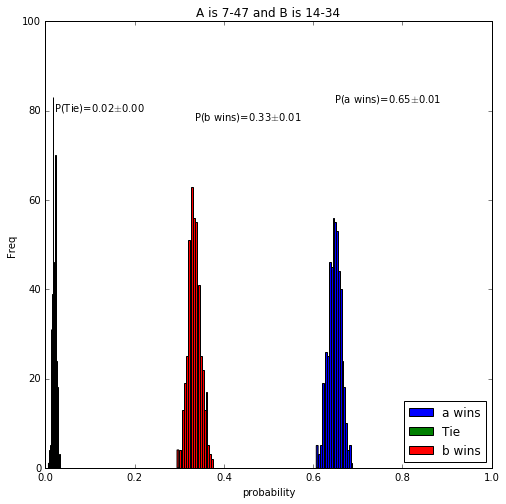

In [61]:
fig, ax = plt.subplots(figsize=(8,8))
_=ax.hist(repeat_result[:,0],bins=20,color='blue',label='a wins')
_=ax.hist(repeat_result[:,1],bins=20,color='green',label='Tie')
_=ax.hist(repeat_result[:,2],bins=20,color='red',label='b wins')
_=ax.annotate('P(a wins)=%.2f$\pm$%.2f'%(repeat_result.mean(0)[0],repeat_result.std(0)[0]),
              xy=(repeat_result.mean(0)[0],82))
_=ax.annotate('P(Tie)=%.2f$\pm$%.2f'%(repeat_result.mean(0)[1],repeat_result.std(0)[1]),
              xy=(repeat_result.mean(0)[1],80))
_=ax.annotate('P(b wins)=%.2f$\pm$%.2f'%(repeat_result.mean(0)[2],repeat_result.std(0)[2]),
              xy=(repeat_result.mean(0)[2],78))
_=ax.set(xlim=(0,1.),ylim=(0,100),xlabel='probability',ylabel='Freq',
        title='A is 7-47 and B is 14-34')
_=ax.legend(loc='lower right')